# **Predicción de Rotación de Empleados**

# **1. Descripción del Problema**
La rotación de empleados es uno de los principales desafíos que enfrentan las organizaciones modernas. La pérdida de talento no solo representa un costo significativo en términos de reclutamiento y capacitación, sino también afecta la productividad, la moral del equipo y la continuidad de proyectos críticos. Comprender los factores que contribuyen a la rotación de empleados y predecir qué empleados tienen un alto riesgo de dejar la organización es esencial para implementar estrategias efectivas de retención.

Este proyecto busca abordar este problema mediante el uso de técnicas de Machine Learning para predecir la probabilidad de rotación de empleados. Los modelos predictivos no solo proporcionarán insights sobre los factores clave que contribuyen a la rotación, sino que también permitirán a las organizaciones tomar decisiones basadas en datos para mejorar la retención y optimizar la gestión del talento.

## **1.1 Descripción del Dataset**
El dataset utilizado en este proyecto es un conjunto de datos sintético que representa información demográfica, laboral y de satisfacción de empleados. Incluye las siguientes columnas:

- **ID_Empleado**: Identificador único del empleado.
- **Edad**: Edad del empleado.
- **Genero**: Género del empleado.
- **Departamento**: Área funcional en la que trabaja el empleado.
- **Anios_En_La_Empresa**: Tiempo total (en años) que el empleado ha trabajado en la organización.
- **Ingreso_Mensual**: Salario mensual del empleado.
- **Satisfaccion_Laboral**: Nivel de satisfacción laboral del empleado (escala de 1 a 4).
- **Balance_Vida_Trabajo**: Percepción del equilibrio entre vida personal y trabajo (escala de 1 a 4).
- **Horas_Extras**: Indicador de si el empleado trabaja horas extras ("Yes" o "No").
- **Rol_Trabajo**: Puesto o función del empleado dentro de la organización.
- **Anios_Desde_Ultima_Promocion**: Tiempo (en años) desde la última promoción del empleado.
- **Veces_Entrenamiento_Ano**: Cantidad de veces que el empleado ha recibido capacitación en el último año.
- **Rotacion**: Indicador de si el empleado dejó la organización ("Yes" o "No").

Este dataset proporciona una base rica para explorar los factores asociados con la rotación y entrenar modelos predictivos.

## **1.2 Lo Que Se Va a Realizar**
En este proyecto, seguiremos un flujo estructurado que incluye:

1. **Exploración y Análisis de los Datos**: Identificaremos patrones y relaciones entre las variables para comprender mejor el comportamiento de la rotación.
2. **Preprocesamiento**: Limpieza de datos, manejo de valores nulos, codificación de variables categóricas y normalización de variables numéricas.
3. **Construcción del Modelo Predictivo**: Implementaremos el modelo de árboles de decisión para predecir la rotación.
4. **Evaluación del Modelo**: Analizaremos el desempeño del modelo utilizando métricas como la matriz de confusión, la curva ROC y las puntuaciones de precisión y recall.


Este flujo asegura que no solo se desarrolle un modelo efectivo, sino que también se obtengan insights claros y útiles para la toma de decisiones.

# **2. Importación de Librerías y Carga de datos**

## **2.1 Importación de Librerías**
Importamos todas las librerías necesarias para desarrollar el proyecto de predicción de rotación de empleados.


In [ ]:
# Importamos las librerías
import pandas as pd  # Librería para manipulación y análisis de datos
import numpy as np  # Librería para operaciones matemáticas
import matplotlib.pyplot as plt  # Librería para visualización gráfica
import seaborn as sns  # Librería para visualizaciones avanzadas
from sklearn.model_selection import train_test_split  # División de datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder  # Escalado y codificación
from sklearn.tree import DecisionTreeClassifier # Modelo de árboles de decisión
from sklearn.linear_model import LogisticRegression #Modelo de Regresión Logística
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score # Métricas de evaluación
import warnings  # Librería para manejar advertencias

## **2.2 Carga y Exploración del Dataset**
Cargaremos el dataset generado previamente y realizaremos una exploración inicial de los datos. Esto nos permitirá entender la estructura del dataset, identificar posibles problemas y comenzar a visualizar patrones relevantes.

### **Carga del Dataset**
Utilizaremos la función `pd.read_csv` de la librería `pandas` para cargar el archivo CSV generado previamente.


In [ ]:
# Cargar los datos
datos = pd.read_csv('https://raw.githubusercontent.com/emadrigals104/Analitica-de-RH/main/Semana2/datos_rotacion_empleados.csv')

# Mostrar las primeras filas del dataset
datos.head()

,ID_Empleado,Edad,Genero,Departamento,Anios_En_La_Empresa,Ingreso_Mensual,Satisfaccion_Laboral,Balance_Vida_Trabajo,Horas_Extras,Rol_Trabajo,Anios_Desde_Ultima_Promocion,Veces_Entrenamiento_Ano,Rotacion
0,c2407940-35d3-4694-af68-85ebf9888ce4,21,Male,HR,7,11290,4,1,Yes,Analyst,0,3,No
1,9b7573b9-4ca6-43c7-8a3a-bf74decb1d15,27,Female,HR,10,12887,2,4,Yes,Manager,7,4,Yes
2,afda97a8-9f2d-4cd4-8345-f6c26e8f415e,54,Female,IT,19,8051,1,4,Yes,Analyst,7,6,Yes
3,0dcd8f74-2d2d-488c-bdbf-80584547c3e9,23,Male,Sales,18,11720,4,3,No,Manager,9,3,No
4,b015e2e1-3b14-4322-96eb-3c022d3a47f1,25,Male,IT,9,6242,2,4,Yes,Manager,3,4,No


# **3. Exploración Inicial de los Datos**
Realizaremos un análisis básico del dataset:
- Dimensiones (número de filas y columnas).
- Tipos de datos de cada columna.
- Valores nulos.
- Estadísticas descriptivas.

In [ ]:
# Dimensiones del dataset
print(f"El dataset contiene {datos.shape[0]} filas y {datos.shape[1]} columnas.")

El dataset contiene 4000 filas y 13 columnas.


In [ ]:
# Tipos de datos
print("Tipos de datos por columna:")
print(datos.dtypes)

Tipos de datos por columna:
ID_Empleado                     object
Edad                             int64
Genero                          object
Departamento                    object
Anios_En_La_Empresa              int64
Ingreso_Mensual                  int64
Satisfaccion_Laboral             int64
Balance_Vida_Trabajo             int64
Horas_Extras                    object
Rol_Trabajo                     object
Anios_Desde_Ultima_Promocion     int64
Veces_Entrenamiento_Ano          int64
Rotacion                        object
dtype: object


In [ ]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(datos.isnull().sum())

Valores nulos por columna:
ID_Empleado                     0
Edad                            0
Genero                          0
Departamento                    0
Anios_En_La_Empresa             0
Ingreso_Mensual                 0
Satisfaccion_Laboral            0
Balance_Vida_Trabajo            0
Horas_Extras                    0
Rol_Trabajo                     0
Anios_Desde_Ultima_Promocion    0
Veces_Entrenamiento_Ano         0
Rotacion                        0
dtype: int64


In [ ]:
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
datos.describe()

Estadísticas descriptivas:


,Edad,Anios_En_La_Empresa,Ingreso_Mensual,Satisfaccion_Laboral,Balance_Vida_Trabajo,Anios_Desde_Ultima_Promocion,Veces_Entrenamiento_Ano
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,38.663000,9.404500,8376.622000,2.171250,2.176000,4.089250,4.314500
std,11.919079,5.695787,3771.690881,1.356792,1.404285,2.856716,2.798848
min,17.000000,0.000000,2007.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,5.000000,5027.250000,1.000000,1.000000,2.000000,2.000000
50%,38.000000,10.000000,8444.000000,2.000000,2.000000,4.000000,4.000000
75%,49.000000,14.000000,11500.000000,3.000000,3.000000,6.000000,7.000000
max,61.000000,21.000000,14989.000000,7.000000,7.000000,12.000000,11.000000


## **3.1 Distribución de la Variable Objetivo**
La variable objetivo en este caso es **`Rotacion`**, que indica si un empleado dejó la organización o no. Visualizaremos la distribución de esta variable.


In [ ]:
# Conteo de valores únicos en la variable objetivo
print("Distribución de la variable 'Rotacion':")
print(datos['Rotacion'].value_counts())

Distribución de la variable 'Rotacion':
Rotacion
No     3166
Yes     834
Name: count, dtype: int64


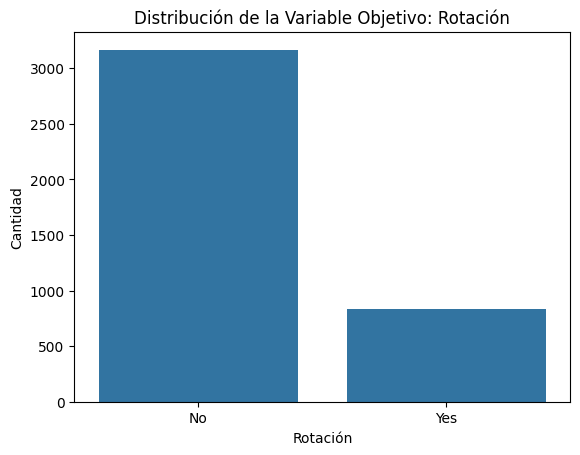

In [ ]:
# Visualización de la distribución
sns.countplot(data=datos, x='Rotacion')
plt.title("Distribución de la Variable Objetivo: Rotación")
plt.xlabel("Rotación")
plt.ylabel("Cantidad")
plt.show()

## **3.2 Insights y Observaciones (Sección 3)**

- **Balance de clases:** la variable *Rotación* está desbalanceada (84% No vs 16% Yes) → aplicar técnicas de oversampling (SMOTE), undersampling o ajuste de pesos en modelos.  
- **Escalas diferentes:** variables como *Ingreso_Mensual* tienen rangos muy amplios frente a *Satisfacción Laboral* → normalizar o estandarizar para algoritmos sensibles a escala.  
- **Codificación de categóricas:** columnas como *Departamento, Rol_Trabajo, Género, Horas_Extras* requieren encoding adecuado (One-Hot o Label Encoding según el modelo).  
- **Generación de nuevas variables:** combinar *Edad* y *Años en la Empresa* (ej. Edad de ingreso) o derivar ratios como *Ingreso/Años en la Empresa* para enriquecer el análisis.  
- **Correlación y relevancia de variables:** calcular matriz de correlación (numéricas) y test Chi-cuadrado (categóricas) para identificar los factores más influyentes en la rotación.  
- **Visualizaciones adicionales:** explorar la rotación por **departamento, género y horas extras** para obtener insights prácticos antes del modelado.


# **4. Análisis Exploratorio de Datos (EDA)**
En esta sección, realizaremos un análisis exploratorio para visualizar y comprender mejor las características del dataset y sus relaciones con la variable objetivo.

## **4.1 Visualización de Distribuciones de Variables Relevantes**
Comenzaremos con la visualización de las distribuciones de variables numéricas y categóricas para identificar patrones iniciales.

####**Histogramas para Variables Numéricas**
Analizaremos variables como **Ingreso_Mensual** y **Anios_En_La_Empresa**.


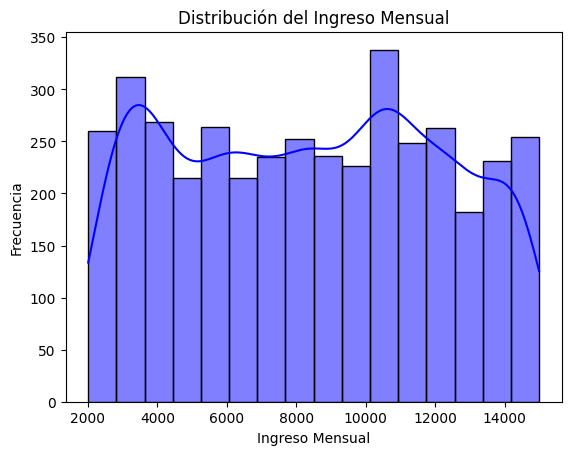

In [ ]:
# Histograma del ingreso mensual
sns.histplot(datos['Ingreso_Mensual'], kde=True, color='blue')
plt.title("Distribución del Ingreso Mensual")
plt.xlabel("Ingreso Mensual")
plt.ylabel("Frecuencia")
plt.show()

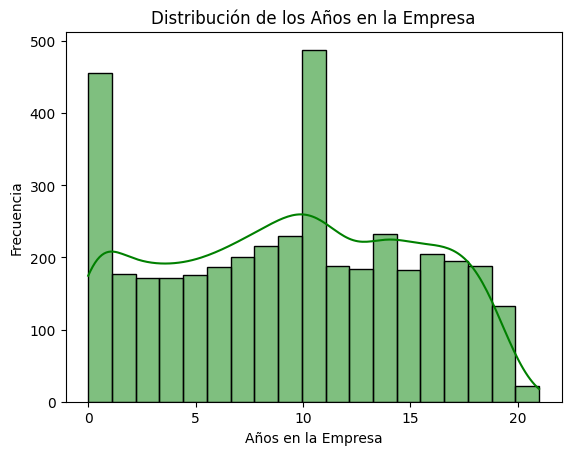

In [ ]:
# Histograma de los años en la empresa
sns.histplot(datos['Anios_En_La_Empresa'], kde=True, color='green')
plt.title("Distribución de los Años en la Empresa")
plt.xlabel("Años en la Empresa")
plt.ylabel("Frecuencia")
plt.show()

## **Gráficos de Barras para Variables Categóricas**
Visualizaremos variables como **Departamento** y **Rol_Trabajo**.

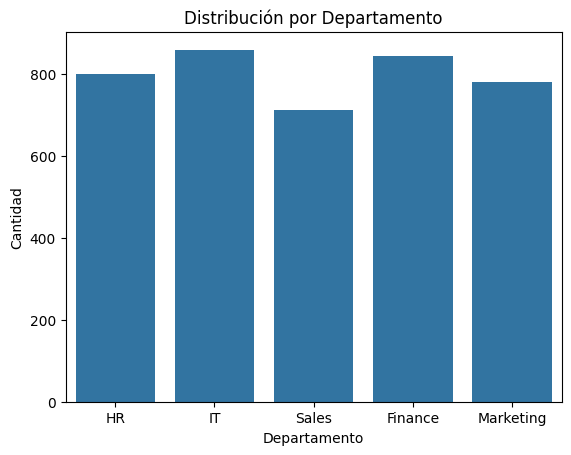

In [ ]:
# Gráfico de barras por departamento
sns.countplot(data=datos, x='Departamento')
plt.title("Distribución por Departamento")
plt.xlabel("Departamento")
plt.ylabel("Cantidad")
plt.show()

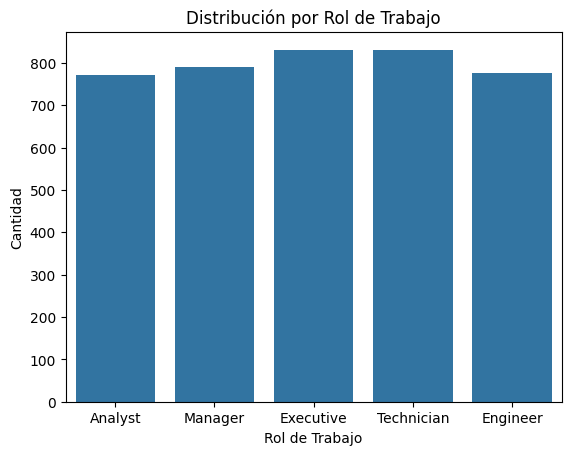

In [ ]:
# Gráfico de barras por rol de trabajo
sns.countplot(data=datos, x='Rol_Trabajo')
plt.title("Distribución por Rol de Trabajo")
plt.xlabel("Rol de Trabajo")
plt.ylabel("Cantidad")
plt.show()

## **4.2 Análisis de Correlación entre Variables Numéricas**
Calcularemos una matriz de correlación para identificar relaciones entre variables numéricas.

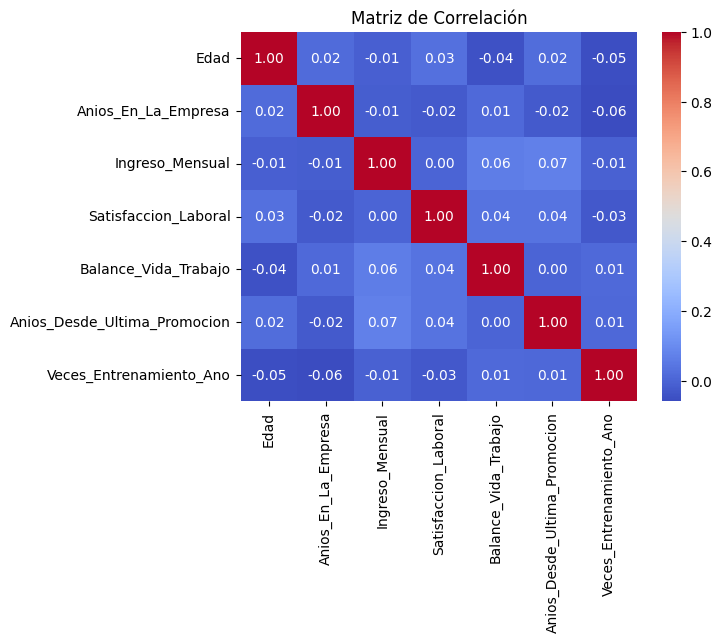

In [ ]:
# Seleccionar solo columnas numéricas
datos_numericos = datos.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
correlacion = datos_numericos.corr()

# Mapa de calor de correlación
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

## **4.3 Relación entre Características y la Variable Objetivo**
Analizaremos cómo las características afectan a la rotación.


Comparación de Métricas entre Empleados que Dejaron y los que No

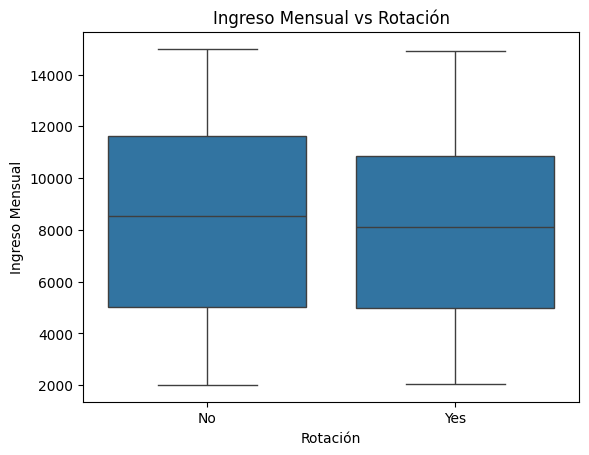

In [ ]:
# Boxplot del ingreso mensual por rotación
sns.boxplot(data=datos, x='Rotacion', y='Ingreso_Mensual')
plt.title("Ingreso Mensual vs Rotación")
plt.xlabel("Rotación")
plt.ylabel("Ingreso Mensual")
plt.show()

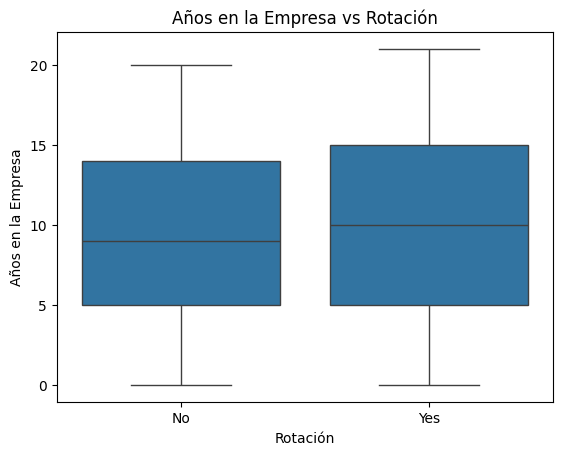

In [ ]:
# Boxplot de los años en la empresa por rotación
sns.boxplot(data=datos, x='Rotacion', y='Anios_En_La_Empresa')
plt.title("Años en la Empresa vs Rotación")
plt.xlabel("Rotación")
plt.ylabel("Años en la Empresa")
plt.show()

## **4.4 Insights y Observaciones (Sección 4)**


- **Distribuciones numéricas:** tanto *Ingreso Mensual* como *Años en la Empresa* muestran dispersión amplia → podría ser necesario aplicar **escalado o transformación logarítmica** en el preprocesamiento.  
- **Variables categóricas balanceadas:** los departamentos y roles tienen una distribución relativamente uniforme, lo que reduce riesgo de sesgo → pero conviene hacer **encoding con cuidado** para no inflar dimensionalidad.  
- **Correlaciones bajas:** no hay correlaciones fuertes entre variables numéricas.
- **Relación con la rotación:** los boxplots sugieren que *Ingreso Mensual* y *Años en la Empresa* no presentan diferencias drásticas entre empleados que rotaron y los que no → se podrían explorar **interacciones de variables** (ej. Ingreso × Satisfacción Laboral).  


# **5. Preprocesamiento de Datos**
El preprocesamiento es una etapa crucial para garantizar que los datos estén en un formato adecuado para entrenar modelos de Machine Learning. En esta sección, realizaremos varias tareas clave de preprocesamiento.

## **5.1 Manejo de Valores Nulos**
Identificaremos y trataremos los valores nulos presentes en el dataset.

In [ ]:
# Manejo de valores nulos
print("\nValores nulos por columna antes del manejo:")
print(datos.isnull().sum())


Valores nulos por columna antes del manejo:
ID_Empleado                     0
Edad                            0
Genero                          0
Departamento                    0
Anios_En_La_Empresa             0
Ingreso_Mensual                 0
Satisfaccion_Laboral            0
Balance_Vida_Trabajo            0
Horas_Extras                    0
Rol_Trabajo                     0
Anios_Desde_Ultima_Promocion    0
Veces_Entrenamiento_Ano         0
Rotacion                        0
dtype: int64


Debido a que no hay valores nulos saltaremos al siguiente punto

## **5.2 Transformación de Variables Categóricas**
Convertiremos las variables categóricas en un formato numérico mediante codificación.

In [ ]:
# Codificación con Label Encoding para simplificar
label_cols = ['Genero', 'Departamento', 'Horas_Extras', 'Rol_Trabajo', 'Rotacion']
encoder = LabelEncoder()
for col in label_cols:
    datos[col] = encoder.fit_transform(datos[col])

## **5.3 Escalado de Variables Numéricas**
Estandarizaremos las variables numéricas para que todas tengan la misma escala.


In [ ]:
# Variables a escalar
scaler = StandardScaler()
num_cols = ['Ingreso_Mensual', 'Anios_En_La_Empresa', 'Anios_Desde_Ultima_Promocion', 'Veces_Entrenamiento_Ano']
datos[num_cols] = scaler.fit_transform(datos[num_cols])

## **5.4 División del Dataset**
Separaremos los datos en conjuntos de entrenamiento y prueba.


In [ ]:
# División de datos en características (X) y variable objetivo (y)
X = datos.drop(columns=['ID_Empleado', 'Rotacion'])
y = datos['Rotacion']

In [ ]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Verificar las dimensiones
print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}")

Dimensiones del conjunto de entrenamiento: (3200, 11)
Dimensiones del conjunto de prueba: (800, 11)


## **5.5 Insights y Observaciones (Sección 5)**

- **Valores nulos:** No se identificaron valores faltantes en ninguna variable, lo que facilita el entrenamiento del modelo sin necesidad de imputaciones adicionales.  
- **Variables categóricas:** Se transformaron en formato numérico mediante *Label Encoding*, permitiendo que los algoritmos puedan procesarlas. Esto asegura que variables como `Genero`, `Departamento` y `Rol_Trabajo` puedan ser utilizadas en el modelo.  
- **Escalado de numéricas:** Variables como `Ingreso_Mensual`, `Anios_En_La_Empresa` y `Veces_Entrenamiento_Ano` fueron estandarizadas, garantizando que todas estén en la misma escala y evitando que unas dominen sobre otras en el proceso de aprendizaje.  
- **División del dataset:** El dataset se dividió en un 80% para entrenamiento y un 20% para prueba, con 3200 registros en entrenamiento y 800 en prueba. Esto permite evaluar de manera confiable el desempeño del modelo.  
- **Balance de clases:** Aunque la variable objetivo `Rotacion` se encuentra desbalanceada (más casos de "No" que de "Yes"), este aspecto se tendrá en cuenta en la etapa de modelado para aplicar técnicas que mitiguen este efecto.


## **6. Construcción del Modelo Predictivo**
En esta sección, implementaremos árboles de Decisión y regresión logística para predecir la rotación de empleados.



## **6.1 Árboles de Decisión**

Los árboles de decisión son algoritmos de aprendizaje supervisado que se utilizan tanto para problemas de clasificación como de regresión. Su funcionamiento se basa en dividir el espacio de características en regiones homogéneas según la variable objetivo.

### **Ventajas de los Árboles de Decisión**
- **Interpretabilidad**: Los árboles de decisión son fáciles de entender y explicar, incluso para personas sin experiencia técnica.
- **No requiere normalización**: A diferencia de otros modelos, no es necesario escalar las variables.
- **Soporte para datos mixtos**: Puede manejar tanto variables categóricas como numéricas.
- **Detección automática de interacciones**: Captura automáticamente las interacciones entre las variables.

### **Conceptos Clave**
1. **Nodos**:
   - **Nodo Raíz**: Representa el conjunto completo de datos.
   - **Nodos Intermedios**: Son divisiones basadas en condiciones sobre las características.
   - **Hojas**: Representan las predicciones finales del modelo.

2. **Criterios de División**:
   - **Gini**: Mide la impureza en un nodo (valores cercanos a 0 son ideales).
   - **Entropía**: Utiliza la teoría de la información para dividir los datos.
   - **Error Cuadrático Medio (MSE)**: Se usa para problemas de regresión.

3. **Profundidad del Árbol**:
   - Controla la complejidad del modelo.
   - Un árbol muy profundo puede sobreajustar los datos (memorizar).
   - Un árbol muy poco profundo puede subajustar (generalizar mal).

### **Importancia de las Características**
Los árboles de decisión calculan la importancia de las características basándose en cómo contribuyen a reducir la impureza (Gini o Entropía) en cada división. Estas importancias pueden ser útiles para interpretar qué variables son más relevantes para el modelo.



### **6.1.1 Entrenamiento del Modelo**
Entrenaremos el modelo de árboles de Decisión utilizando el conjunto de datos preprocesado.

In [ ]:
# Inicializar el modelo de arboles de decisión
decision_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [ ]:
# Entrenar el modelo con los datos de entrenamiento
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Predicción en el conjunto de prueba
y_pred = decision_tree.predict(X_test)

In [ ]:
# Predicción de probabilidades
y_prob = decision_tree.predict_proba(X_test)[:, 1]

### **6.1.2 Evaluación del modelo**
La evaluación del modelo es una etapa crucial en cualquier proyecto de Machine Learning, ya que nos permite entender qué tan bien está funcionando el modelo para predecir la variable objetivo. Utilizaremos varias métricas para evaluar el modelo de árboles de Decisión entrenado.

### **Curva ROC y AUC**
La curva ROC (Receiver Operating Characteristic) muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a diferentes umbrales de clasificación. El área bajo la curva (AUC) es una medida que resume el desempeño general del modelo.


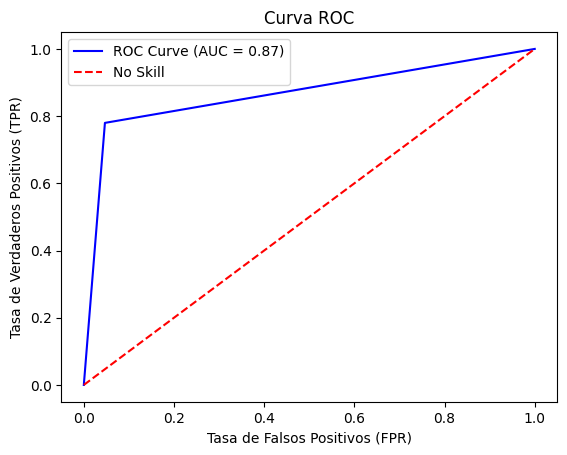

In [ ]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='No Skill')
plt.title("Curva ROC")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.show()

### **6.1.3 Matriz de Confusión**
La matriz de confusión nos permite visualizar los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. Es una herramienta clave para evaluar los errores del modelo.


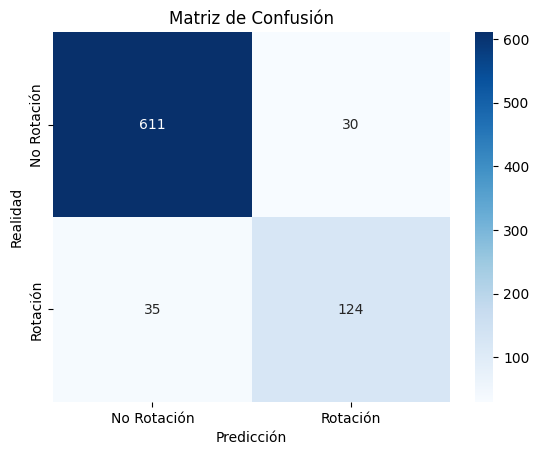

In [ ]:
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=['No Rotación', 'Rotación'], yticklabels=['No Rotación', 'Rotación'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

### **6.1.4 Reporte de Clasificación**
El reporte de clasificación proporciona métricas clave como precisión, recall y F1-score para cada clase. Estas métricas nos ayudan a entender la calidad del modelo en detalle.


In [ ]:
# Generar el reporte de clasificación
reporte_clasificacion = classification_report(y_test, y_pred, target_names=['No Rotación', 'Rotación'],zero_division=0)
print("Reporte de Clasificación:")
print(reporte_clasificacion)

Reporte de Clasificación:
              precision    recall  f1-score   support

 No Rotación       0.95      0.95      0.95       641
    Rotación       0.81      0.78      0.79       159

    accuracy                           0.92       800
   macro avg       0.88      0.87      0.87       800
weighted avg       0.92      0.92      0.92       800



## **6.2 Regresión Logística**

### **¿Qué es la Regresión Logística?**

La regresión logística es un algoritmo de aprendizaje supervisado utilizado para tareas de clasificación. Su objetivo es predecir la probabilidad de pertenencia de una observación a una clase específica. Aunque su nombre incluye el término 'regresión', se emplea principalmente para problemas de clasificación binaria.

### **¿Por qué usar la Regresión Logística?**

1. **Interpretabilidad:** Fácil de entender e interpretar los coeficientes.  
2. **Eficiencia:** Funciona bien en problemas linealmente separables.  
3. **Probabilidades de Salida:** Proporciona probabilidades en lugar de solo etiquetas de clase.  
4. **Generalización:** Es menos propensa al sobreajuste si se aplica regularización.  

### **Fórmula Matemática**

La función logística (sigmoide) se define como:

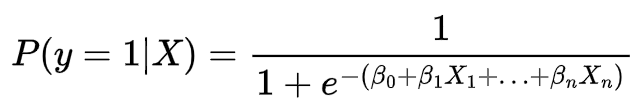

donde:
- P(y=1|X) es la probabilidad de que la clase sea 1 dado (X).  
- β0, β1,....,βn son los coeficientes del modelo.

### **6.2.1 Entrenamiento del Modelo**
Entrenaremos el modelo de regresión logística utilizando el conjunto de datos preprocesado.

In [ ]:
# Crear y entrenar el modelo
modelo_logistica = LogisticRegression()
modelo_logistica.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Hacer predicciones
y_pred_logistica = modelo_logistica.predict(X_test)
# Predicción de probabilidades
y_prob_logistica = modelo_logistica.predict_proba(X_test)[:, 1]

### **6.2.2 Evaluación del Modelo**
La evaluación del modelo es una etapa crucial en cualquier proyecto de Machine Learning, ya que nos permite entender qué tan bien está funcionando el modelo para predecir la variable objetivo. Utilizaremos varias métricas para evaluar el modelo de regresión logística entrenado.

### **Curva ROC y AUC**
La curva ROC (Receiver Operating Characteristic) muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a diferentes umbrales de clasificación. El área bajo la curva (AUC) es una medida que resume el desempeño general del modelo.


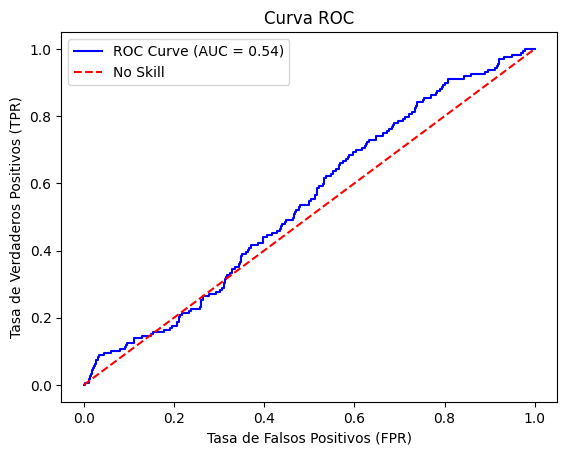

In [ ]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logistica)
auc = roc_auc_score(y_test, y_prob_logistica)

# Graficar la curva ROC
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='No Skill')
plt.title("Curva ROC")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.show()

### **6.2.3 Matriz de Confusión**
La matriz de confusión nos permite visualizar los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. Es una herramienta clave para evaluar los errores del modelo.


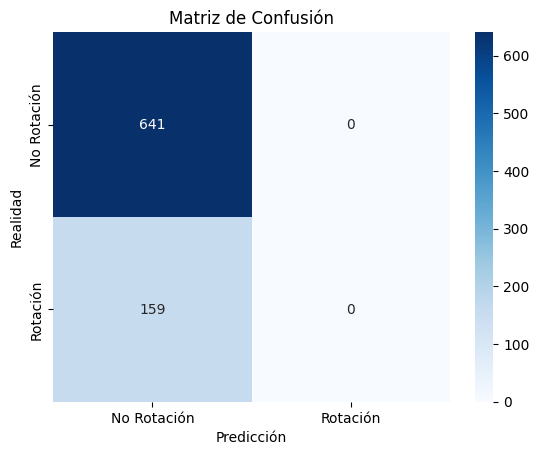

In [ ]:
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred_logistica)

# Visualizar la matriz de confusión
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=['No Rotación', 'Rotación'], yticklabels=['No Rotación', 'Rotación'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

### **6.2.4 Reporte de Clasificación**
El reporte de clasificación proporciona métricas clave como precisión, recall y F1-score para cada clase. Estas métricas nos ayudan a entender la calidad del modelo en detalle.


In [ ]:
# Generar el reporte de clasificación
reporte_clasificacion = classification_report(y_test, y_pred_logistica, target_names=['No Rotación', 'Rotación'],zero_division=0)
print("Reporte de Clasificación:")
print(reporte_clasificacion)

Reporte de Clasificación:
              precision    recall  f1-score   support

 No Rotación       0.80      1.00      0.89       641
    Rotación       0.00      0.00      0.00       159

    accuracy                           0.80       800
   macro avg       0.40      0.50      0.44       800
weighted avg       0.64      0.80      0.71       800



## **6.3 Insights y Observaciones (Sección 6)**

- **Árboles de Decisión**:
  - El modelo obtuvo un **AUC de 0.87**, lo que indica una buena capacidad de discriminación entre empleados que rotan y los que no.
  - La **matriz de confusión** muestra un buen equilibrio, con precisión alta en la clase mayoritaria (No Rotación) y un desempeño aceptable en la clase minoritaria (Rotación).
  - El **reporte de clasificación** refleja un **F1-score de 0.79 en la clase Rotación**, lo cual es positivo considerando el desbalance de clases.
  - Este modelo es útil para **interpretar qué variables influyen en la rotación** y puede servir como base para estrategias de retención.

- **Regresión Logística**:
  - El modelo tuvo un **AUC de 0.54**, cercano al azar, lo que indica **bajo poder predictivo** en este caso.
  - La **matriz de confusión** revela que el modelo clasificó casi todos los casos como *No Rotación*, sin identificar adecuadamente a los empleados que sí rotan.
  - En el **reporte de clasificación**, la clase *Rotación* obtuvo un **F1-score de 0.00**, evidenciando que el modelo no logra capturar patrones útiles para predecir la salida de empleados.
  - Aunque no es competitivo en desempeño, la regresión logística sigue siendo valiosa por su **interpretabilidad**, permitiendo observar la dirección e intensidad de las variables que influyen en la probabilidad de rotación.

- **Comparativa General**:
  - El **Árbol de Decisión supera claramente a la Regresión Logística** en desempeño predictivo para este dataset.
  - Sin embargo, ambos modelos ofrecen perspectivas complementarias:  
    - El Árbol es más preciso para predicción.  
    - La Regresión Logística ayuda a comprender mejor la relación lineal entre variables y la rotación.  

# **7. Comparación de Modelos por Precisión**

En esta sección comparamos dos modelos de clasificación: Regresión Logística
y árboles de decisión. Se evalúan en función de su precisión para determinar cuál ofrece el mejor rendimiento en el conjunto de datos.


In [ ]:
accuracy_ad = accuracy_score(y_test, y_pred)
accuracy_lr = accuracy_score(y_test, y_pred_logistica)
print("Precisión Regresión Logística:", accuracy_lr)
print("Precisión árboles de decisión:", accuracy_ad)

Precisión Regresión Logística: 0.80125
Precisión árboles de decisión: 0.91875


## **7.1 Tabla de Resultados Reales vs Predichos**
Aquí visualizamos una tabla que compara los valores reales con las predicciones del modelo KNN, el cual ha mostrado el mejor desempeño en términos de precisión en este caso específico.


In [ ]:
resultados = pd.DataFrame({
    'Real': y_test,
    'Predicción': y_pred
})

resultados

,Real,Predicción
555,0,0
3491,0,0
527,0,1
3925,0,0
2989,0,0
...,...,...
1922,1,0
865,0,0
3943,1,1
1642,1,1


## **7.2 Insights y Observaciones (Sección 7)**

La comparación entre modelos mostró diferencias significativas en el rendimiento:  

- **Regresión Logística:** Obtuvo una precisión de **80.12%**, pero con limitaciones al predecir la clase minoritaria de "Rotación". Esto se refleja en un sesgo hacia la clase mayoritaria.  
- **Árboles de Decisión:** Lograron una precisión superior de **91.87%**, mostrando mejor capacidad para identificar correctamente ambos escenarios de rotación y no rotación.  
- La tabla de resultados confirma que, aunque ambos modelos presentan predicciones correctas, el árbol de decisión mantiene una mejor **balance entre sensibilidad y precisión**, lo que lo convierte en la alternativa más confiable para este caso.  
- Los árboles de decisión no solo ofrecen mayor precisión, sino también mejor interpretabilidad y adaptabilidad a datos mixtos, lo que los posiciona como el modelo más recomendable para este problema de predicción de rotación.


# **8. Estrategias y Recomendaciones**

## **8.1 Objetivo de negocio**
Usar los modelos de clasificación para **predecir la rotación de empleados** y **diseñar estrategias de retención** que reduzcan la pérdida de talento, priorizando acciones preventivas en perfiles con mayor riesgo de salida.

## **8.2 Cómo usar el modelo**
1. **Modelo recomendado:**  
   - **Árboles de Decisión (Accuracy ≈ 0.92, AUC = 0.87):** mejor capacidad predictiva y balance entre clases.  
   - **Regresión Logística (Accuracy ≈ 0.80, AUC = 0.54):** útil como modelo base por su interpretabilidad, aunque menos efectivo.  
2. **Entrada esperada:** variables demográficas, laborales y de satisfacción, preprocesadas (escalado numérico y codificación de categorías).  
3. **Salida:** predicción binaria (Rotación: Sí/No) + probabilidad asociada.  
4. **Decisión:**  
   - Si **predice Rotación con alta confianza** → activar plan de retención.  
   - Si **predice No Rotación** → mantener estrategias de engagement y monitoreo.  

## **8.3 Intervenciones sugeridas**
- **Ingreso Mensual (indicador sensible):**  
  - Diseñar esquemas de **revisión salarial competitiva**.  
  - Beneficios no monetarios como bonos de desempeño y flexibilidad laboral.  
- **Años en la Empresa / Promociones:**  
  - Fortalecer **planes de carrera y movilidad interna**.  
  - Identificar perfiles estancados y ofrecer **oportunidades de desarrollo**.  
- **Balance Vida-Trabajo y Horas Extras:**  
  - Políticas de **descanso y flexibilidad horaria**.  
  - Detección temprana de sobrecarga laboral.  
- **Satisfacción Laboral:**  
  - Programas de **clima organizacional y reconocimiento**.  
  - Encuestas periódicas para identificar puntos críticos.  

## **8.4 Estrategias por perfil de predicción**
- **Predicción Rotación = Sí**  
  - **Acción:** plan de retención personalizado (ajustes en salario, mentoría, oportunidades de crecimiento).  
  - **Seguimiento:** revisión mensual de métricas de satisfacción y desempeño.  
- **Predicción Rotación = No**  
  - **Acción:** mantener motivación mediante reconocimiento y beneficios.  
  - **Seguimiento:** monitoreo semestral para detectar posibles cambios de tendencia.  

## **8.5 Métricas de éxito y monitoreo**
- **Modelo:** Accuracy, Recall de la clase "Rotación", y curva ROC/AUC.  
- **Negocio:** reducción de la **tasa de rotación anual** y costos asociados a reclutamiento.  
- **RR.HH.:** mejora en **satisfacción laboral**, aumento en retención de empleados clave y participación en programas internos.  

## **8.6 Posibles mejoras**
1. **Codificación avanzada:** migrar de LabelEncoder a **One-Hot Encoding** para mejorar la Regresión Logística.  
2. **Balance de clases:** aplicar técnicas como **SMOTE/undersampling** para reducir el sesgo hacia la clase mayoritaria (No Rotación).  
3. **Optimización:** búsqueda de hiperparámetros con **GridSearchCV** en Árboles y Logística.  
4. **Modelos alternativos:** probar **Random Forest** o **XGBoost** para mayor robustez.  
5. **Retraining periódico:** actualizar el modelo cada 6–12 meses o ante cambios en la dinámica laboral.  

## **8.7 Resumen ejecutivo**
- **Árboles de Decisión** se consolidan como el modelo más efectivo para la predicción de rotación.  
- Las principales palancas de intervención son: **ingresos, promociones, balance vida-trabajo y satisfacción laboral**.  
- El modelo debe ser una **herramienta de apoyo para RR.HH.**, combinando predicciones con estrategias preventivas y de retención.  
- Es clave mantener un **monitoreo continuo y reentrenamiento periódico** para garantizar que el modelo se adapte a cambios en el entorno laboral.  
